
First 8 rows:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414

Last 8 rows:
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5

General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    ob

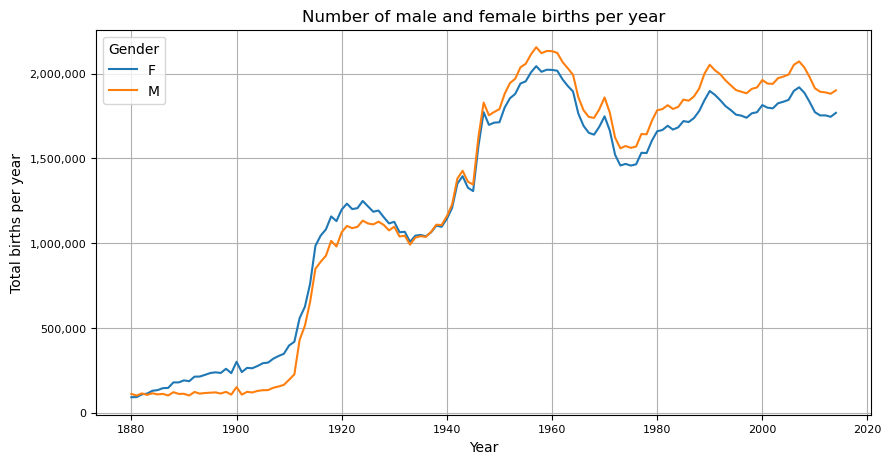


Number of gender-neutral names: 10221

How many times boys were named 'Barbara': 4139

Most popular gender-neutral names:
Name
James          5129096
John           5106590
Robert         4816785
Michael        4330805
Mary           4130441
William        4071368
David          3590557
Joseph         2580687
Richard        2564867
Charles        2376700
Thomas         2291517
Christopher    2004177
Daniel         1876880
Elizabeth      1606282
Patricia       1575529
Name: Count, dtype: int64


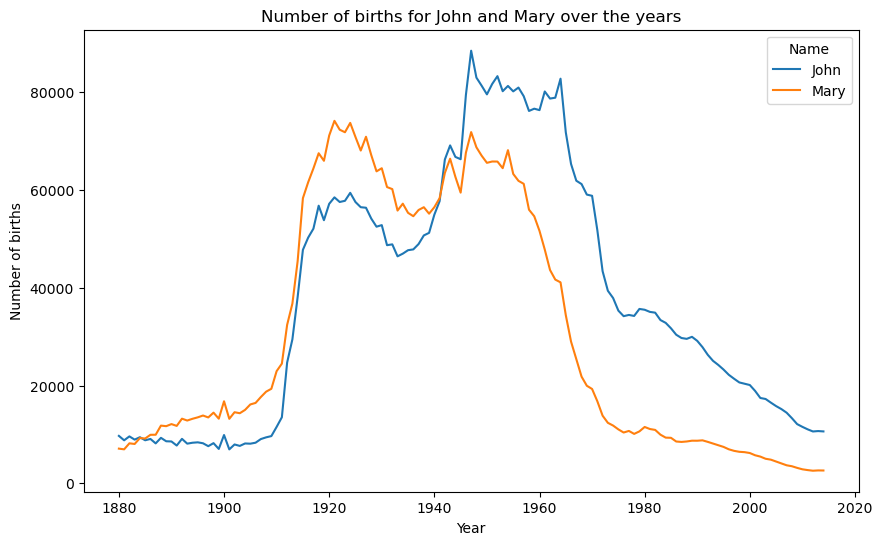


Most popular names in each year:
         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


df = pd.read_csv('NationalNames.csv')


# 1. Display the first 8 rows:
print("\nFirst 8 rows:")
print(df.head(8))

# 2. Display the last 8 rows:
print("\nLast 8 rows:")
print(df.tail(8))

# 4. Get general information about the data:
print("\nGeneral information about the data:")
df.info()

# 5. Find the number of unique names:
unique_names_count = df['Name'].nunique()
print("\nNumber of unique names:", unique_names_count)

# 6. Count the number of unique female and male names:
female_names = df[df['Gender'] == 'F']['Name'].nunique()
male_names = df[df['Gender'] == 'M']['Name'].nunique()
print(f"\nNumber of unique female names: {female_names}, unique male names: {male_names}")

# 7. Find the top 5 most popular male names in 2010:
top_male_names_2010 = df[(df['Year'] == 2010) & (df['Gender'] == 'M')].sort_values(by='Count', ascending=False).head(5)
print("\nTop 5 most popular male names in 2010:")
print(top_male_names_2010)

# 8. Find the most popular name for a specific year (name with maximum Count):
year = 1947  
popular_name = df[df['Year'] == year].sort_values(by='Count', ascending=False).head(1)
print(f"\nThe most popular name in {year}:")
print(popular_name)

# 9. Count the number of records where Count is minimal:
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]
print("\nNumber of records with minimum Count:", min_count_records)

# 10. Count the number of unique names for each year:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
print("\nNumber of unique names per year:")
print(unique_names_per_year)

# 11. Find the year with the highest number of unique names:
max_year = unique_names_per_year.idxmax()
print("\nYear with the highest number of unique names:", max_year)

# 12. Find the most popular name in the year with the highest number of unique names:
most_popular_in_max_year = df[df['Year'] == max_year].sort_values(by='Count', ascending=False).head(1)
print("\nMost popular name in the year with the highest number of unique names:")
print(most_popular_in_max_year)

# 18. Count the number of years when more girls were born than boys:
births_per_gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
more_girls_years = (births_per_gender_per_year['F'] > births_per_gender_per_year['M']).sum()
print("\nNumber of years when more girls were born than boys:", more_girls_years)

# 19. Plot the number of male and female births per year 
births_per_gender_per_year.plot(kind='line', figsize=(10, 5), color=['#1f77b4', '#ff7f0e'])

plt.title('Number of male and female births per year', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total births per year', fontsize=10)

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)  
plt.show()

# 20. Count the number of gender-neutral names:
neutral_names = df.groupby('Name')['Gender'].nunique()
neutral_count = neutral_names[neutral_names == 2].count()
print("\nNumber of gender-neutral names:", neutral_count)

# 21. Count how many times boys were named "Barbara":
barbara_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print("\nHow many times boys were named 'Barbara':", barbara_count)

# 23. Find the most popular gender-neutral names:
neutral_names_list = neutral_names[neutral_names == 2].index
popular_neutral_names = df[df['Name'].isin(neutral_names_list)].groupby('Name')['Count'].sum().sort_values(ascending=False)
print("\nMost popular gender-neutral names:")
print(popular_neutral_names.head(15))

# 25. Plot graphs for the names John and Mary over the years:
john_mary_data = df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
john_mary_data.plot(kind='line', figsize=(10,6))
plt.title('Number of births for John and Mary over the years')
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.show()

# 27. Find the most popular names in each year:
most_popular_names_per_year = df.loc[df.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]
print("\nMost popular names in each year:")
print(most_popular_names_per_year)